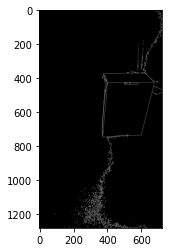

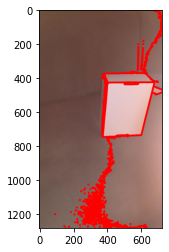

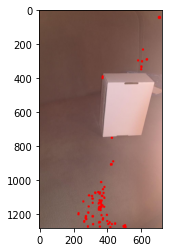

In [10]:
#DRAW EDGES OF THE BOX
#https://stackoverflow.com/questions/29156091/opencv-edge-border-detection-based-on-color
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html
#https://stackoverflow.com/questions/48259724/cv2-drawcontours-unfill-circles-inside-characters-python-opencv
#

import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
debhist=0
debhsv=0
debresult=0
debcanny=1
debcnts=1
image=cv2.cvtColor(cv2.imread('body/box1.jpg'),cv2.COLOR_BGR2RGB)
imageout=image.copy()
wholelow=(0,0,0)
wholehigh=(135,115,115)
wholemask= cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
wholeimage=cv2.bitwise_and(image,image,mask=wholemask)
#edges/contours on the masked image
##
filterparam=(100,20,0)
imagedges=cv2.Canny(cv2.cvtColor(wholeimage, cv2.COLOR_RGB2GRAY),filterparam[0], filterparam[1], filterparam[2])
##morphology operation also here?
#imagedges=mymorph(imagedges,'open',(1,4,1))
##lines from canny are too small and erosion kills also usefull ones
##rectangular kernel (1,3)or(3,1) can be usefull for vertical/horizontaz lines respectively 
if debcanny:
    plt.imshow(imagedges,cmap='gray')
    plt.show()

# find contours
cnts= cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
imageout1=image.copy()
contours=cv2.findContours(imagedges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#contours selection
##or #cnts=imutils.xyz(cnts) for pickup right one wrt py version
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours=contours[0] if len(contours)==2 else contours[1]
##add selection of 4 edges contours
rect_cnts = []
areas = []
for cnt in contours:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.1 * peri, True)
    #ar = w / float(h)
    if len(approx) == 4: # shape filtering condition
        area = cv2.contourArea(cnt)
        if area >= 5.0:
            areas.append(area)
            rect_cnts.append(cnt)
# opening/closing for removing noise: better to be done after contours found
##cherrypiching with hough? moments?
## alsoM = cv2.moments(c)
## center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
# draw contours
contcolor=(255,0,0)
conthick=10
for c in cnts:
    cv2.drawContours(imageout,c, -1, contcolor, conthick) # OR
    #cv2.polylines(image, [box], True, (36,255,12), 3)
cv2.drawContours(imageout1,rect_cnts, -1, contcolor, conthick)
if debcnts:
    plt.imshow(imageout)
    plt.show()
    plt.imshow(imageout1)    
    plt.show()

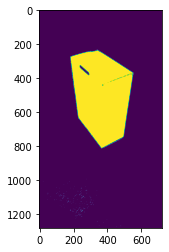

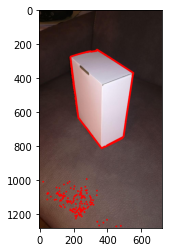

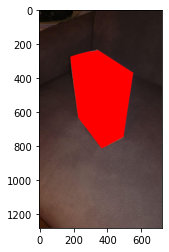

In [50]:
#without canny
import cv2
import numpy as np
from matplotlib import pyplot as plt
debug=0
debhist=0
debhsv=0
debresult=0
debcnts=1
image=cv2.cvtColor(cv2.imread('body/box4.jpg'),cv2.COLOR_BGR2RGB)
imageout=image.copy()
wholelow=(0,0,0)
wholehigh=(135,115,115)
wholemask= cv2.bitwise_not(cv2.inRange(image,wholelow,wholehigh))#killmaskt
wholeimage=cv2.bitwise_and(image,image,mask=wholemask)
plt.imshow(wholemask)
plt.show()
# find contours
cnts= cv2.findContours(wholemask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# contours selection
max_cnt = max(cnts, key=len) #max contour area
max_area=cv2.contourArea(max_cnt)
out_cnts=[]
##improve:dilate before comparison and pick the inner areas
for cc in cnts:
    if cv2.contourArea(cc)>0.01*max_area:#cherrypicking
        out_cnts.append(cc)
imageout1=image.copy()
contcolor=(255,0,0)
conthick=10
for c in cnts:
    cv2.drawContours(imageout,c, -1, contcolor, conthick) # OR
    #cv2.polylines(image, [box], True, (36,255,12), 3)
cv2.drawContours(imageout1,out_cnts, -1, contcolor, -1)
#imageout1=mymorph(imageout1,'erode',(5,5,20))
if debcnts:
    plt.imshow(imageout)
    plt.show()
    plt.imshow(imageout1)    
    plt.show()
    
#this can be usefull to find a bounding rectangle for the panel's body and remove the non usefull image area



In [26]:
    
        cv2.drawContours(image,[box],0,color,thickness)
        # STILL I THINK NOT WORKING


#if self.verifySizes(rect):
    #...
    #rect.append(...verifyed) 
poly = cv2.boxPoints(rect)
#cx, cy = rect[0]
#w, h = rect[1]
#theta = rect[2]
#box[idx, :] = [cx, cy, w, h, theta]
#box = np.asarray(box, dtype = xs.dtype)

NameError: name 'box' is not defined

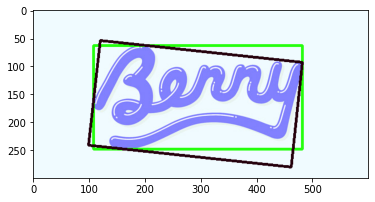

In [1]:
#bounding rect and rotated rectangle
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image, convert to grayscale, Otsu's threshold for binary image
image = cv2.imread("body/commercial.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours, find rotated rectangle, obtain four verticies, and draw 
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

x,y,w,h = cv2.boundingRect(cnts[0])
cv2.rectangle(image, (x,y), (x+w,y+h), (36,255,12), 3)

rect = cv2.minAreaRect(cnts[0])
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], 0, (36,0,12), 3) # OR
    #cv2.polylines(image, [box], True, (36,255,12), 3)

# taking biggest contour and minarearect
#max_contour = max(cnts, key=len)
#rect = cv2.minAreaRect(max_contour)


plt.imshow(image)
plt.show()

In [14]:
def mythreshold(img2thr,thrmethod, thrparam):
    
     #adaptive param??
    
    if thrmethod=='canny':
        #requires 3 param , eg: thrparam=(120,255,0)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg = cv2.Canny(img2thr_grey, thrparam[0], thrparam[1], thrparam[2])
    elif thrmethod=='simple':
        #requires 2 param , eg: thrparam=(127,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],cv2.THRESH_BINARY)
        #also cv2.THRESH_BINARY_INV , cv2.THRESH_TRUNC , cv2.THRESH_TOZERO , cv2.THRESH_TOZERO_INV
    elif thrmethod=='otsu':
        #requires 2 param , eg: thrparam=(0,255)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        _,thrdimg = cv2.threshold(img2thr_grey,thrparam[0], thrparam[1],
                                           cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    elif thrmethod=='adaptive':
        # requires 3 param , eg: thrparam=(255,11,2)
        img2thr_grey=cv2.cvtColor(img2thr, cv2.COLOR_RGB2GRAY)
        thrdimg=cv2.adaptiveThreshold(img2thr_grey,thrparam[0], cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY,thrparam[1], thrparam[2])
        #also cv2.ADAPTIVE_THRESH_GAUSSIAN_C , same parameters
    elif thrmethod=='killcolor':
        #requires 2 param (vectorial) , eg: thrcol_low=(50,50,50) , thrcol_high=(255,255,255)
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5]) #color window
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV) #hsv 
        thrmask = cv2.bitwise_not(cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high))
        thrdimg = thrmask# for the mask #cv2.bitwise_and(img2thr,img2thr, mask=thrmask) #for the masked image
    elif thrmethod=='letcolor':
        #requires 2 param (vectorial) ,
        thrcol_low=(thrparam[0],thrparam[1],thrparam[2])
        thrcol_high=(thrparam[3],thrparam[4],thrparam[5])
        thrimg_hsv=cv2.cvtColor(img2thr, cv2.COLOR_BGR2HSV)
        thrmask = cv2.inRange(thrimg_hsv, thrcol_low,thrcol_high)
        thrdimg = thrmask#cv2.bitwise_and(img2thr,img2thr, mask=thrmask)
    #else: print('not binarized!')
    return thrdimg

## switch, elif, dictionaris: which one to use?
#https://www.pydanny.com/why-doesnt-python-have-switch-case.html
#https://stackoverflow.com/questions/60208/replacements-for-switch-statement-in-python
## more efficient way to pass many parameters
#
def myfilter(fltgimg,fltmeth,fltparam):
    
    #adaptive kernel ??
    
    if fltmeth=='gaussian':
        #3param eg: fltparam=(21,21,0)
        filtdimg=cv2.GaussianBlur(fltgimg, (fltparam[0],fltparam[1]),fltparam[2])
    elif fltmeth=='bilateral':
        #3param eg: fltparam=(21,51,51)
        filtdimg=cv2.bilateralFilter(fltgimg,fltparam[0],fltparam[1],fltparam[2])
    #elif fltmeth=='mean':
        #
    elif fltmeth=='median':
        #1param eg: fltparam=(21)
        filtdimg=cv2.medianBlur(img, fltparam[0])
    #else: print('not filtered')
    return filtdimg

#https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html
#https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

def mymorph(mrpimg,mrpmeth,mrpparam):
# requires 4 param ie: mrpparam=(kern_sizex,kern_sizey,numbiter_erode, numbiter_dilate)    
    #adaptive kernel??
    
    
    #if mrpmeth!=0:
    if mrpparam[0]==0:
        mrpkernel=cv2.getStructuringElement( cv2.MORPH_RECT, (7,7))
    else:
        mrpkernel = cv2.getStructuringElement( cv2.MORPH_RECT, ( mrpparam[0], mrpparam[1] ) )
    if mrpmeth=='close':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_CLOSE, mrpkernel )
    elif mrpmeth=='open':
        mrpdimg = cv2.morphologyEx( mrpimg, cv2.MORPH_OPEN, mrpkernel )    
    elif mrpmeth=='erode':
        mrpdimg = cv2.erode(mrpimg,mrpkernel,iterations = mrpparam[2])
    elif mrpmeth=='dilate':
        mrpdimg = cv2.dilate(mrpimg,mrpkernel,iterations = mrpparam[2])
    #else: print('not morphed')
        
    return mrpdimg